In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
"""
#load data

data_columns = ["Month","Sales"]

dictionary = {key:[] for key in data_columns}

data = ["1-01",266.0,
"1-02",145.9,
"1-03",183.1,
"1-04",119.3,
"1-05",180.3,
"1-06",168.5,
"1-07",231.8,
"1-08",224.5,
"1-09",192.8,
"1-10",122.9,
"1-11",336.5,
"1-12",185.9,
"2-01",194.3,
"2-02",149.5,
"2-03",210.1,
"2-04",273.3,
"2-05",191.4,
"2-06",287.0,
"2-07",226.0,
"2-08",303.6,
"2-09",289.9,
"2-10",421.6,
"2-11",264.5,
"2-12",342.3,
"3-01",339.7,
"3-02",440.4,
"3-03",315.9,
"3-04",439.3,
"3-05",401.3,
"3-06",437.4,
"3-07",575.5,
"3-08",407.6,
"3-09",682.0,
"3-10",475.3,
"3-11",581.3,
"3-12",646.9]

for i in range(len(data)):
    if i % 2 == 0:
        dictionary["Month"].append(data[i])
    else:
        dictionary["Sales"].append(data[i])
        
df = pd.DataFrame(dictionary)

df["Month"] = df.Month.replace("-", "/", regex=True)

df.set_index("Month", inplace=True)

df = pd.to_datetime(df.index, format="%m/%d")

print(df)
"""


'\n#load data\n\ndata_columns = ["Month","Sales"]\n\ndictionary = {key:[] for key in data_columns}\n\ndata = ["1-01",266.0,\n"1-02",145.9,\n"1-03",183.1,\n"1-04",119.3,\n"1-05",180.3,\n"1-06",168.5,\n"1-07",231.8,\n"1-08",224.5,\n"1-09",192.8,\n"1-10",122.9,\n"1-11",336.5,\n"1-12",185.9,\n"2-01",194.3,\n"2-02",149.5,\n"2-03",210.1,\n"2-04",273.3,\n"2-05",191.4,\n"2-06",287.0,\n"2-07",226.0,\n"2-08",303.6,\n"2-09",289.9,\n"2-10",421.6,\n"2-11",264.5,\n"2-12",342.3,\n"3-01",339.7,\n"3-02",440.4,\n"3-03",315.9,\n"3-04",439.3,\n"3-05",401.3,\n"3-06",437.4,\n"3-07",575.5,\n"3-08",407.6,\n"3-09",682.0,\n"3-10",475.3,\n"3-11",581.3,\n"3-12",646.9]\n\nfor i in range(len(data)):\n    if i % 2 == 0:\n        dictionary["Month"].append(data[i])\n    else:\n        dictionary["Sales"].append(data[i])\n        \ndf = pd.DataFrame(dictionary)\n\ndf["Month"] = df.Month.replace("-", "/", regex=True)\n\ndf.set_index("Month", inplace=True)\n\ndf = pd.to_datetime(df.index, format="%m/%d")\n\nprint(df)\n'

In [3]:
#download data and change index column to datetime object 

df = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-sunspots.csv")

df.set_index("Month", inplace=True)

df.index = pd.to_datetime(df.index, format="%Y/%m")

print(df)

df = df.iloc[-400:, :]

            Sunspots
Month               
1749-01-01      58.0
1749-02-01      62.6
1749-03-01      70.0
1749-04-01      55.7
1749-05-01      85.0
...              ...
1983-08-01      71.8
1983-09-01      50.3
1983-10-01      55.8
1983-11-01      33.3
1983-12-01      33.4

[2820 rows x 1 columns]


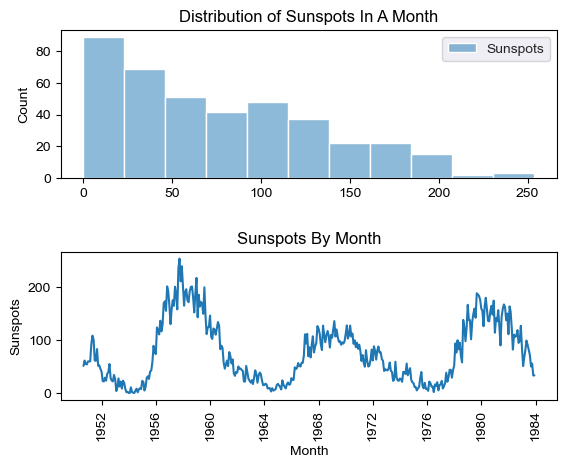

In [4]:
fig, ax = plt.subplots(2, 1)

sns.set_style("darkgrid")
sns.histplot(df, ax=ax[0]).set(title="Distribution of Sunspots In A Month")

sns.lineplot(data=df, x=df.index, y="Sunspots", ax=ax[1]).set(title="Sunspots By Month")

plt.xticks(rotation=90)
fig.subplots_adjust(hspace=.5)
plt.show()

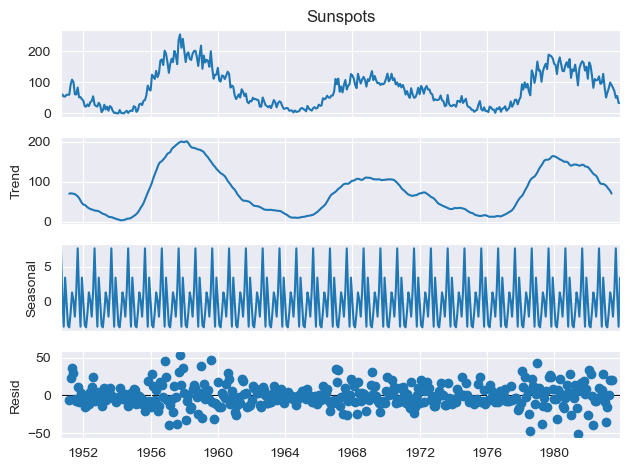

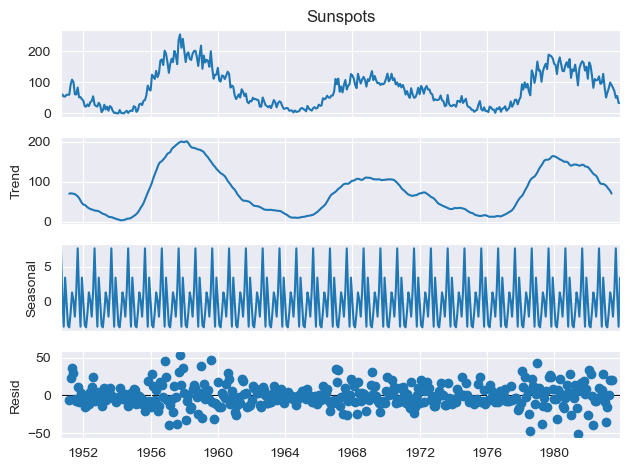

In [5]:
seasonal_decompose(df["Sunspots"], model="additive", period=12).plot()

#strong seasonality with heteroscadasticity observed in the later years 

C:\Users\egrah\AppData\Local\Temp\ipykernel_9100\2224704118.py:12: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  results_kpss = kpss(df["Sunspots_diff_1"], regression="ct")


ADF: T-statistic: -2.8708111773783007
KPSS: T-statistic: 0.05397368058588611
ADF: P Value: 0.048849070625582684
KPSS: P Value: 0.1
ADF: # of Lags: 17
KPSS: # of Lags: 19
ADF: Observations: 381
KPSS: Observations: {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}


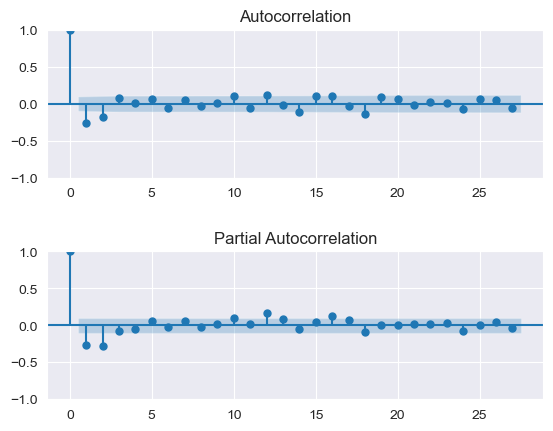

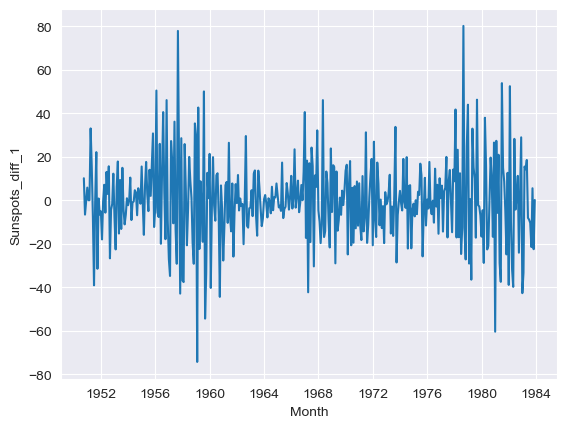

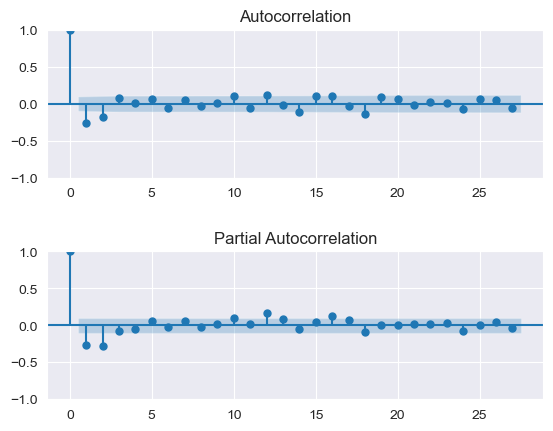

In [6]:
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#take the first difference of the time series

df["Sunspots_diff_1"] = df["Sunspots"].diff()
df= df.dropna()

sns.lineplot(data=df, x=df.index, y="Sunspots_diff_1")

results_adf = adfuller(df["Sunspots_diff_1"], autolag="AIC")
results_kpss = kpss(df["Sunspots_diff_1"], regression="ct")

indices = ["T-statistic", "P Value", "# of Lags", "Observations"]

for i in range(len(indices)):
    print(f"ADF: {indices[i]}: {results_adf[i]}")
    print(f"KPSS: {indices[i]}: {results_kpss[i]}")
    
fig, ax = plt.subplots(2,1)

fig.subplots_adjust(hspace=.5)

plot_acf(df["Sunspots_diff_1"], ax=ax[0])
plot_pacf(df["Sunspots_diff_1"], ax=ax[1]) 

C:\Users\egrah\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\egrah\AppData\Local\Temp\ipykernel_9100\2098777650.py:16: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_forecasts["SES"] = ses.fittedvalues.append(preds)


Text(0, 0.5, 'Sunspots')

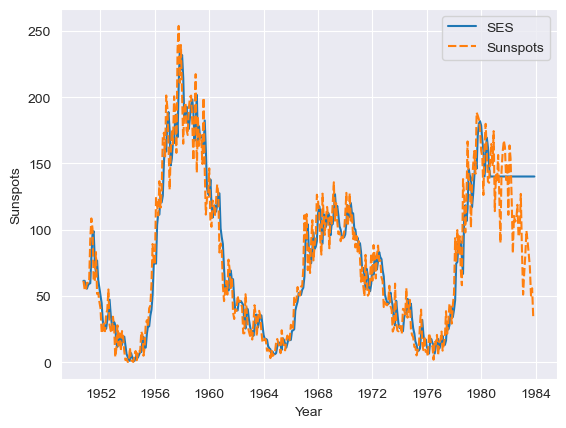

In [8]:
#Time Series Forecasting with Simple Exponential Smoothing 
from statsmodels.tsa.holtwinters import (ExponentialSmoothing, SimpleExpSmoothing, Holt)

test_len = int(np.round(len(df["Sunspots"])*.10, 0))

df_train = df.iloc[:-test_len, 0]
df_test = df.iloc[-test_len:, 0]


ses = SimpleExpSmoothing(df_train).fit()

preds = ses.forecast(len(df_test))

df_forecasts = df.copy()

df_forecasts["SES"] = ses.fittedvalues.append(preds)


sns.lineplot(data=df_forecasts[["SES", "Sunspots"]])
plt.xlabel("Year")
plt.ylabel("Sunspots")



C:\Users\egrah\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\egrah\AppData\Local\Temp\ipykernel_9100\146745586.py:14: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_forecasts["double_SES"] = ses.fittedvalues.append(preds)
C:\Users\egrah\AppData\Local\Temp\ipykernel_9100\146745586.py:15: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_forecasts["double_SES_damped"] = ses.fittedvalues.append(preds)


Text(0.5, 0, 'Year')

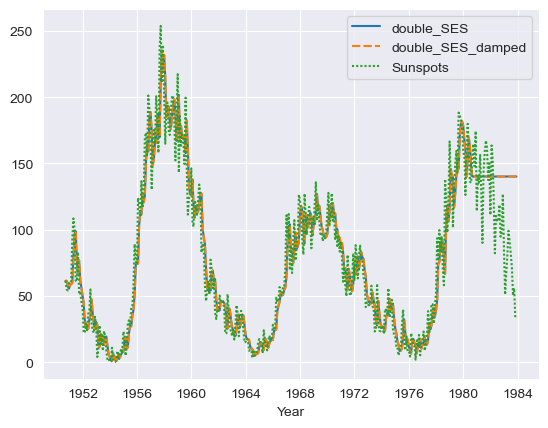

In [11]:
#Double Exponential Smoothing
from sklearn.metrics import mean_squared_error


ses_2_model = Holt(df_train)

ses_2 = ses_2_model.fit()
ses_2_damped = ses_2_model.fit(damping_trend = .7)


preds_2 = ses_2.forecast(len(df_test))
preds_2_damped = ses_2_damped.forecast(len(df_test))

df_forecasts["double_SES"] = ses.fittedvalues.append(preds)
df_forecasts["double_SES_damped"] = ses.fittedvalues.append(preds)


sns.lineplot(data=df_forecasts[["double_SES", "double_SES_damped", "Sunspots"]])
plt.xlabel("Year")

C:\Users\egrah\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\egrah\AppData\Local\Temp\ipykernel_9100\1718634801.py:6: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_forecasts["ses_triple"] = ses_3.fittedvalues.append(ses_3_preds)


Text(0.5, 0, 'Year')

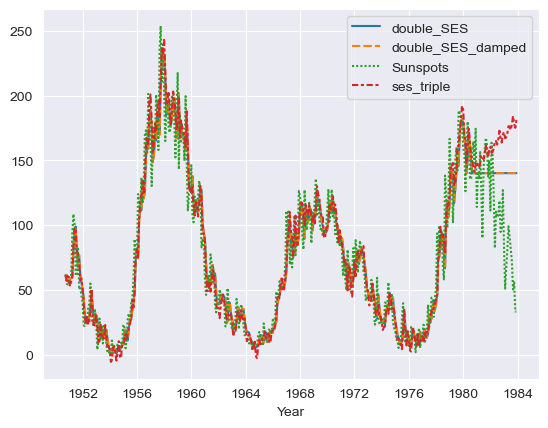

In [12]:
ses_3 = ExponentialSmoothing(df_train, trend="add", seasonal="add", seasonal_periods=12).fit()

ses_3_preds = ses_3.forecast(len(df_test))


df_forecasts["ses_triple"] = ses_3.fittedvalues.append(ses_3_preds)

sns.lineplot(data=df_forecasts[["double_SES", "double_SES_damped", "Sunspots", "ses_triple"]])

plt.xlabel("Year")

#we can see there is much more to the time series than a seasonal component and the trend and level components of the 
#exponential smoothing model are only usually accurate for one period ahead. We will try arma models next

(-2.8708111773783007, 0.048849070625582684, 17, 381, {'1%': -3.4476305904172904, '5%': -2.869155980820355, '10%': -2.570827146203181}, 3278.5837077088026)


C:\Users\egrah\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\egrah\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\egrah\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:               Sunspots   No. Observations:                  359
Model:                 ARIMA(1, 0, 3)   Log Likelihood               -1528.018
Date:                Sat, 09 Dec 2023   AIC                           3068.037
Time:                        08:04:19   BIC                           3091.337
Sample:                    10-01-1950   HQIC                          3077.302
                         - 08-01-1980                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         72.6524     37.205      1.953      0.051      -0.269     145.573
ar.L1          0.9800      0.011     89.428      0.000       0.958       1.001
ma.L1         -0.3300      0.047     -7.010      0.0

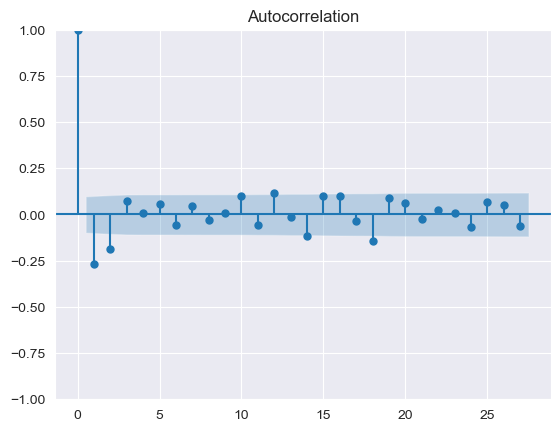

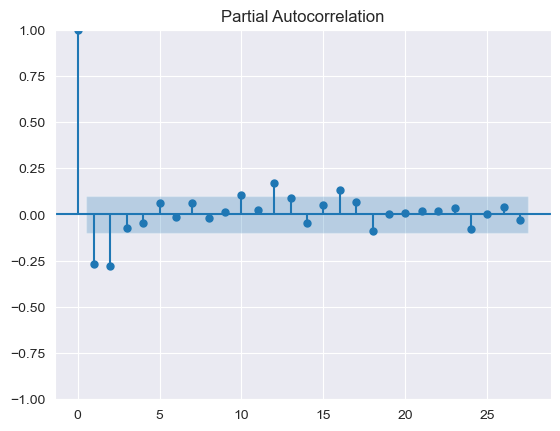

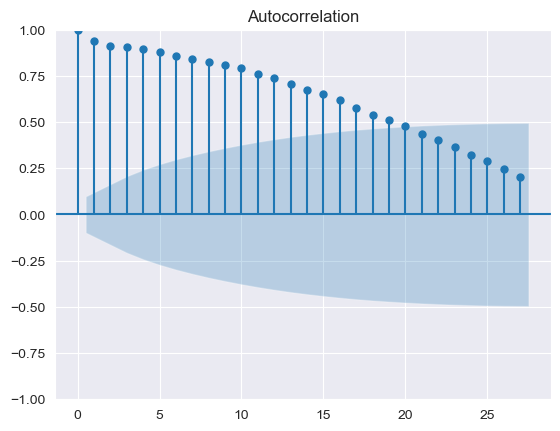

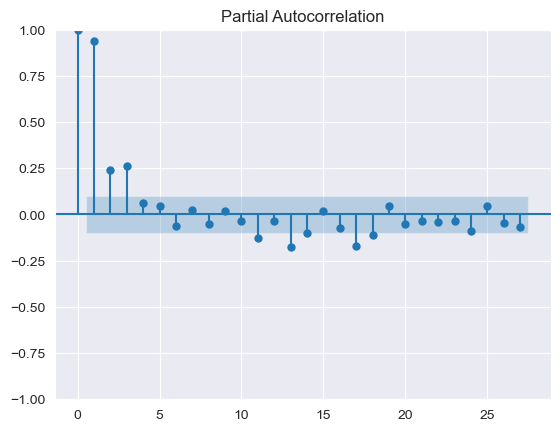

In [28]:
#Arima, Sarima, auto arima
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error

plot_acf(df["Sunspots_diff_1"])
plot_pacf(df["Sunspots_diff_1"])

print(adfuller(df["Sunspots_diff_1"]))

#the augmented dickey fuller test has determined are time series is already stationary with the first difference
#there is strong partial auto correlation in the time seriesup to two lags as observed by the autocorrelation graph 

arima = ARIMA(df_train, order=(1,0,3)).fit()


print(arima.summary())
#after trial an error observing particular p values related to the lagged coefficients the correct order for the model was determined
#Ljung Box test on residuals appear to show us that they are white noise 
#the probability of our heterscadascticity test on the residuals tells us are models errors do not grow as the time series progresses
#the residuals ARE NOT normally distributed as seen by our jarque-bera test. Our residuals are peaked at the center and our skew is positive so our model overestiamtes the majority of predicitons  
#I minimized the AIC score by adjusting the order hyperparameters

C:\Users\egrah\AppData\Local\Temp\ipykernel_9100\2473281684.py:3: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_forecasts["arima"] = arima.fittedvalues.append(arima.forecast(len(df_test)))


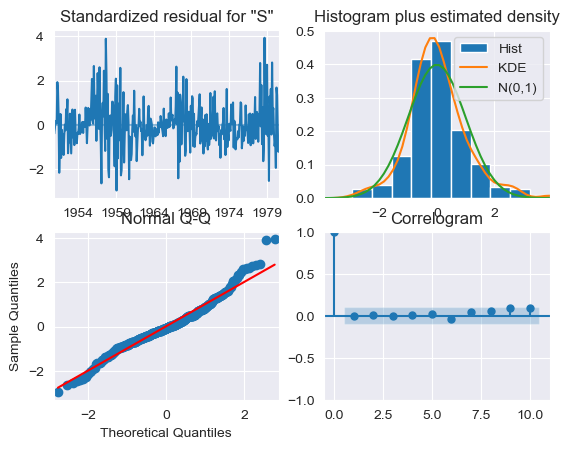

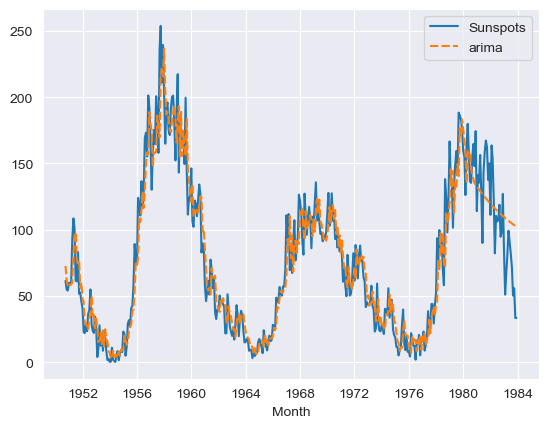

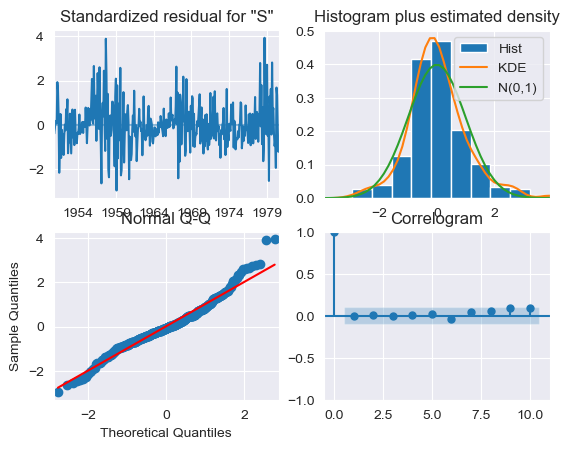

In [27]:
#predict and assess arima model

df_forecasts["arima"] = arima.fittedvalues.append(arima.forecast(len(df_test)))


sns.lineplot(data=df_forecasts[["Sunspots", "arima"]])

arima.plot_diagnostics()


C:\Users\egrah\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\egrah\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\egrah\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\egrah\AppData\Local\Temp\ipykernel_9100\2571897706.py:5: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_forecasts["sarima"] = sarima.fittedvalues.append(sarima.forecast(len(df_test)))


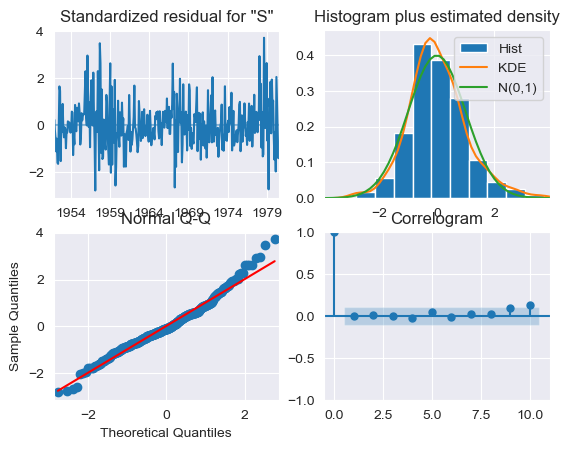

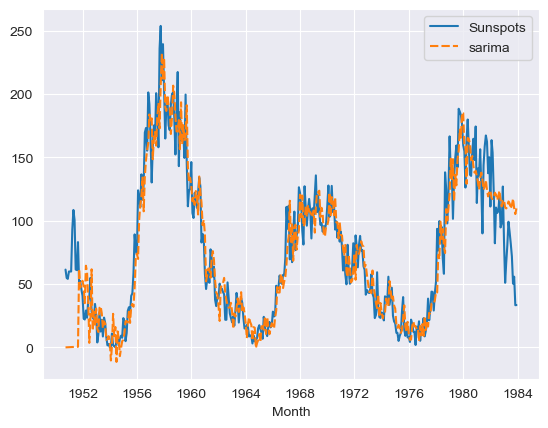

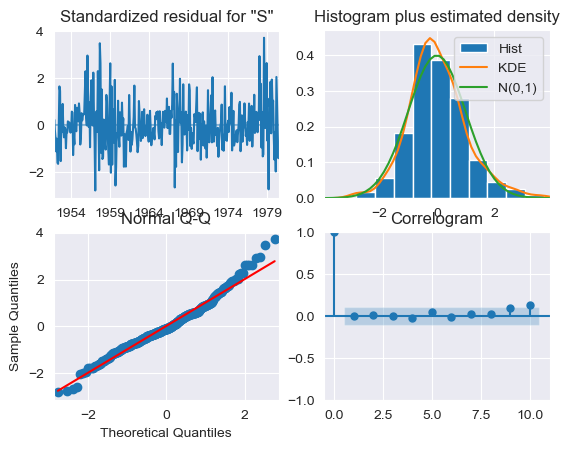

In [31]:
#add a seasonal component 

sarima = ARIMA(df_train, order=(1, 0, 3), seasonal_order=(2,1,1,12)).fit()

df_forecasts["sarima"] = sarima.fittedvalues.append(sarima.forecast(len(df_test)))

sns.lineplot(data=df_forecasts[["Sunspots", "sarima"]])

sarima.plot_diagnostics()



Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=3066.494, Time=3.42 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=3930.181, Time=0.06 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=3110.152, Time=0.99 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=3443.383, Time=1.11 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=4271.683, Time=0.05 sec
 ARIMA(2,0,2)(0,0,1)[12] intercept   : AIC=3064.169, Time=2.51 sec
 ARIMA(2,0,2)(0,0,0)[12] intercept   : AIC=3071.135, Time=0.65 sec
 ARIMA(2,0,2)(0,0,2)[12] intercept   : AIC=3066.174, Time=5.34 sec
 ARIMA(2,0,2)(1,0,0)[12] intercept   : AIC=3064.721, Time=2.48 sec
 ARIMA(2,0,2)(1,0,2)[12] intercept   : AIC=3067.336, Time=6.15 sec
 ARIMA(1,0,2)(0,0,1)[12] intercept   : AIC=3068.965, Time=1.62 sec
 ARIMA(2,0,1)(0,0,1)[12] intercept   : AIC=3071.359, Time=1.52 sec
 ARIMA(3,0,2)(0,0,1)[12] intercept   : AIC=3066.285, Time=2.89 sec
 ARIMA(2,0,3)(0,0,1)[12] intercept   : AIC=3065.272, Time=2.20 sec
 ARIMA(1,0,1)(0,0,1

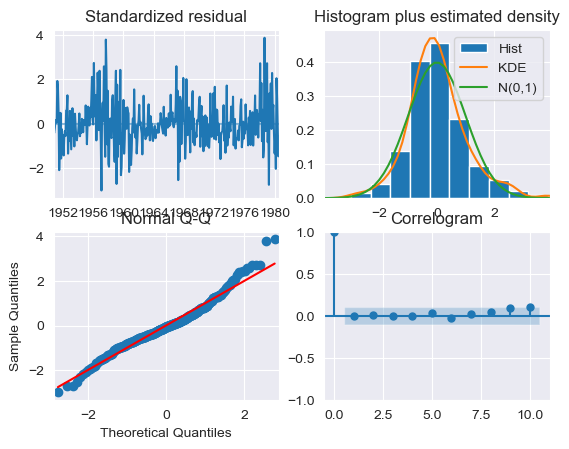

In [17]:
#fit a new model using auto arima
import pmdarima as pm

auto_arima = pm.auto_arima(df_train, trace=True, seasonal=True, m=12)

auto_arima.summary()
auto_arima.plot_diagnostics()

preds = auto_arima.predict(len(df_test))

#varima
#arch, garch

            Sunspots  Sunspots_diff_1         SES  double_SES  \
Month                                                           
1950-10-01      61.4             10.1   61.400000   61.400000   
1950-11-01      54.8             -6.6   61.400000   61.400000   
1950-12-01      54.1             -0.7   57.508956   57.508956   
1951-01-01      59.9              5.8   55.499199   55.499199   
1951-02-01      59.9              0.0   58.093700   58.093700   
...              ...              ...         ...         ...   
1983-08-01      71.8            -10.4  140.142067  140.142067   
1983-09-01      50.3            -21.5  140.142067  140.142067   
1983-10-01      55.8              5.5  140.142067  140.142067   
1983-11-01      33.3            -22.5  140.142067  140.142067   
1983-12-01      33.4              0.1  140.142067  140.142067   

            double_SES_damped  ses_triple       arima      sarima  auto_sarima  
Month                                                                    

C:\Users\egrah\AppData\Local\Temp\ipykernel_9100\3412893000.py:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_forecasts["auto_sarima"] = sarima.fittedvalues.append(preds)


<Axes: xlabel='Month'>

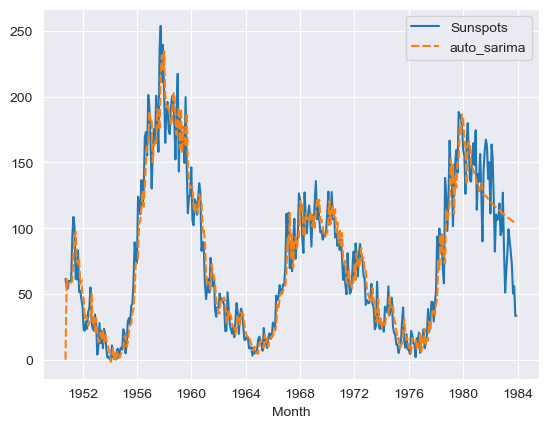

In [25]:

df_forecasts["auto_sarima"] = sarima.fittedvalues.append(preds)

print(df_forecasts)

sns.lineplot(data=df_forecasts[["Sunspots", "auto_sarima"]])

In [41]:
#test each models accuracy 

for index in range(1, len(df_forecasts.columns)):
    print(f"Model - {df_forecasts.columns[index]} - MAPE: {mean_absolute_percentage_error(df_forecasts.iloc[-(len(df_test)):, 0], df_forecasts.iloc[-(len(df_test)):, index])} \n")


Model - Sunspots_diff_1 - MAPE: 1.0672015475954952 

Model - SES - MAPE: 0.5511877150844544 

Model - double_SES - MAPE: 0.5511877150844544 

Model - double_SES_damped - MAPE: 0.5511877150844544 

Model - ses_triple - MAPE: 0.7860296966562278 

Model - arima - MAPE: 0.34332388215669163 

Model - sarima - MAPE: 0.3778187292420311 

Model - auto_sarima - MAPE: 0.3472401349477548 

